In [15]:
%load_ext autoreload
%autoreload 2
import numpy as np
import uproot 
import matplotlib.pyplot as plt
#from Hist_plot import * 
#from peak_fit import * 
from scipy.optimize import *
from scipy.signal import find_peaks,peak_widths,peak_prominences
from scipy import stats
from fit_peak import * 

In [3]:
Energy1 = []
for arrays in uproot.iterate("~/Desktop/multi_run/R1/FILTERED/*.root","Data_F;4","Energy",outputtype=list):
    
    for x in arrays:
        Energy1.extend(x)
        

In [4]:
bin = np.arange(0,max(Energy1))
y,binedges = np.histogram(Energy1,bin)

bincenters = 0.5*(binedges[1:]+binedges[:-1])



In [5]:
Y = y
peaks, properties = find_peaks(Y,distance = 65,prominence =10**3,width = [0,18])
peaks1,properties1 = find_peaks(Y)

prominences = peak_prominences(Y, peaks)[0]
widths = peak_widths(Y, peaks)

print(widths[0])
print(y[peaks])

[ 9.17219001 12.74388602 14.26940213 17.18782734]
[870314 120928  71065   2427]


<Figure size 432x288 with 0 Axes>

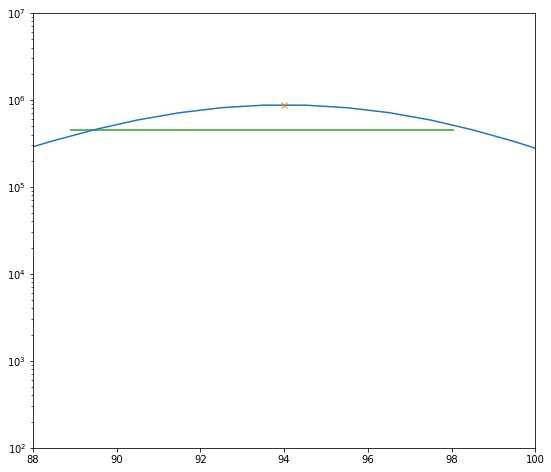

In [6]:
plt.figure()
plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
plt.plot(bincenters,y)
plt.plot(peaks,y[peaks],'x')
plt.hlines(*widths[1:], color="C2")

plt.yscale('log')
plt.xlim(88,100)
plt.ylim(10**2,10**7)
plt.show()

In [7]:
print(widths[0][1])
amp = y[peaks]

12.743886021061115


In [8]:
ADC_loc = []
for x in peaks: 
    a = bincenters[x]
    ADC_loc.append(a)
    
print(ADC_loc)
params = [amp[1],ADC_loc[1],widths[0][1],5,10]
print(params[1]+15)

[94.5, 212.5, 294.5, 413.5]
227.5


[870314, 94.5, 9.172190013448741, 0, 1]


/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


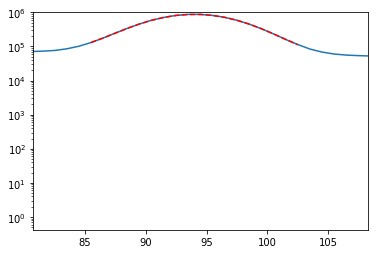

amp = 816724.03 +/- 949.34
cen = 94.02 +/- 0.00
wid = -3.74 +/- 0.01
slope = -1173.68 +/- 68.65
intercept = 170635.39 +/- 6517.79
[120928, 212.5, 12.743886021061115, 0, 1]


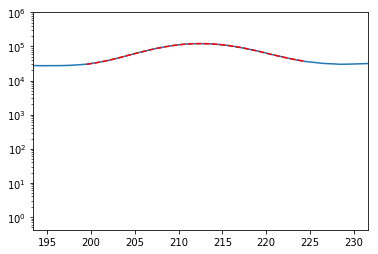

amp = 94746.78 +/- 333.72
cen = 212.48 +/- 0.02
wid = 5.38 +/- 0.03
slope = 160.32 +/- 16.90
intercept = -7215.28 +/- 3527.87
[71065, 294.5, 14.26940213488416, 0, 1]


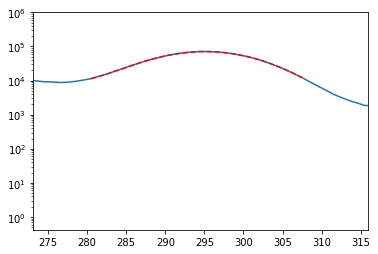

amp = 66811.20 +/- 197.30
cen = 295.21 +/- 0.01
wid = -6.35 +/- 0.02
slope = -181.41 +/- 8.47
intercept = 57763.93 +/- 2398.18
[2427, 413.5, 17.187827337144427, 0, 1]


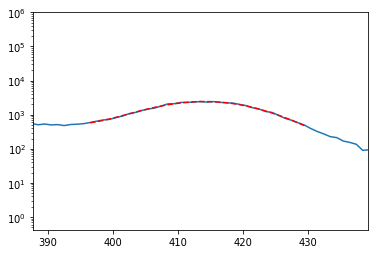

amp = 2163.35 +/- 46.17
cen = 414.36 +/- 0.12
wid = 7.85 +/- 0.20
slope = -8.21 +/- 1.58
intercept = 3672.86 +/- 631.70
[94.02415035434424, 212.48169748097584, 295.20828680422625, 414.35723354174564]


In [9]:

ADC = []
for i in np.arange(len(ADC_loc)):
    params = [amp[i],ADC_loc[i],widths[0][i],0,1]
    print(params)
    results = fit_peak(bincenters, y,params)
    ADC.append(results[1])
print(ADC)

<Figure size 432x288 with 0 Axes>

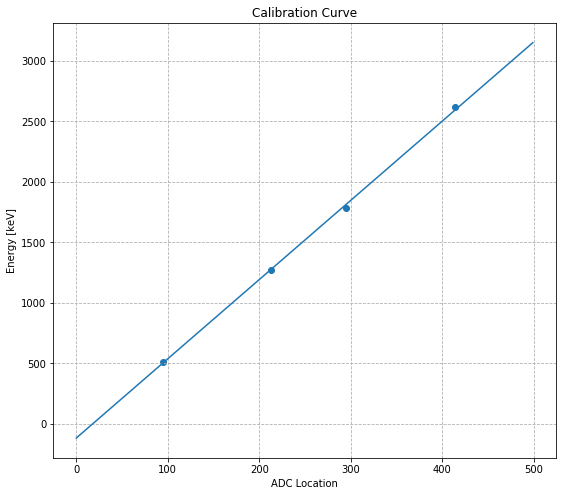

Slope = 6.540972180979933 Intercept = -115.5236382910125 error = 0.11421884153141103


In [10]:
EN = [511,1274,1785,2614] #where peaks should be


slope, intercept, r_value, p_value, std_err = stats.linregress(ADC,EN)

fit = []
z = np.arange(0,500)
for x in z:
    y = slope*x + intercept
    fit.append(y)
    



plt.figure()
plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
plt.scatter(ADC_loc,EN)
plt.plot(z,fit)
plt.title('Calibration Curve')
plt.xlabel('ADC Location')
plt.ylabel('Energy [keV]')
plt.grid(which='major',axis= 'both',linestyle='--')
plt.show()

print('Slope =',slope, 'Intercept =', intercept, 'error =', std_err)

In [11]:
E1_cal = []
for x in Energy1:   
    E1 = slope*x + intercept
    E1_cal.append(E1)

[ 499.32774672 1271.16246408 1807.52218292 2585.89787245]
[870314 120928  71065   2427]
[175.51867801 198.88104223 208.85940069 227.94873875]


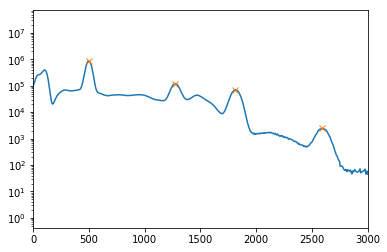

In [12]:
cal_bin = slope*bin + intercept

d,binedge = np.histogram(E1_cal,cal_bin)

bincenter = 0.5*(binedge[1:]+binedge[:-1])

cal_peak = slope*peaks + intercept 

cal_width = slope*widths[0] - intercept



plt.plot(bincenter,d)
plt.plot(cal_peak,d[peaks],'x')
plt.xlim(0,3000)
plt.yscale('log')





print(cal_peak)
print(d[peaks])
print(cal_width)


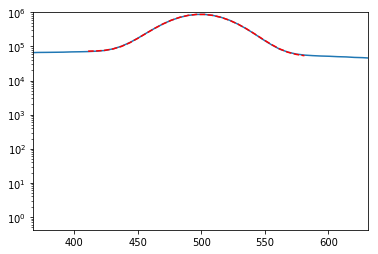

amp = 816322.28 +/- 855.39
cen = 499.38 +/- 0.03
wid = 24.42 +/- 0.04
slope = -123.88 +/- 6.76
intercept = 122616.13 +/- 3346.68


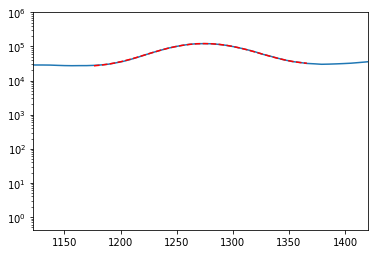

amp = 94431.79 +/- 265.41
cen = 1274.45 +/- 0.10
wid = 35.05 +/- 0.14
slope = 20.28 +/- 1.99
intercept = 1382.32 +/- 2501.56


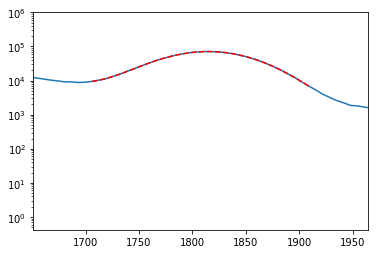

amp = 66781.87 +/- 119.63
cen = 1815.46 +/- 0.07
wid = -41.49 +/- 0.10
slope = -28.29 +/- 0.80
intercept = 55603.77 +/- 1411.07


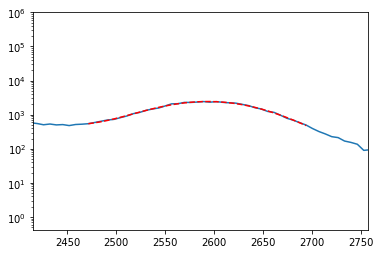

amp = 2163.30 +/- 42.83
cen = 2594.78 +/- 0.75
wid = -51.32 +/- 1.21
slope = -1.26 +/- 0.23
intercept = 3528.25 +/- 578.54


In [13]:
amps = d[peaks]

for i in np.arange(len(ADC_loc)):
    params1 = [amps[i],cal_peak[i],cal_width[i]/2,5,10]
    #print(params)
    fit_peak(bincenter, d,params1)